In [1]:
import pandas as pd

# Charger les données
df = pd.read_csv("data/listings.csv.gz", compression='gzip', low_memory=False)

# Dimensions du jeu de données
print("Dimensions :", df.shape)

# Aperçu
df.head()


Dimensions : (86064, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20250303043259,2025-03-11,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.04
1,5396,https://www.airbnb.com/rooms/5396,20250303043259,2025-03-03,city scrape,Your perfect Paris studio on Île Saint-Louis,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.95,4.59,7510402838018,f,1,1,0,0,2.28
2,7397,https://www.airbnb.com/rooms/7397,20250303043259,2025-03-07,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.75,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20250303043259,2025-03-04,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20250303043259,2025-03-07,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


In [2]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [3]:

colonnes_utiles = [
    'id', 'name', 'host_id', 'neighbourhood_cleansed', 'room_type',
    'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365', 'last_review'
]

df = df[colonnes_utiles]


df.head()


,id,name,host_id,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review
0,3109,zen and calm,3631,Observatoire,Entire home/apt,$100.00,2,4,0.04,356,2019-10-24
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,Hôtel-de-Ville,Entire home/apt,$97.00,1,435,2.28,114,2025-02-16
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Hôtel-de-Ville,Entire home/apt,$129.00,10,373,2.20,188,2025-02-26
3,7964,Sunny apartment with balcony,22155,Opéra,Entire home/apt,NaN,7,5,0.03,0,2015-09-14
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Louvre,Entire home/apt,$75.00,180,0,NaN,358,NaN


In [6]:
df.dtypes

id                          int64
name                       object
host_id                     int64
neighbourhood_cleansed     object
room_type                  object
price                      object
minimum_nights              int64
number_of_reviews           int64
reviews_per_month         float64
availability_365            int64
last_review                object
dtype: object

In [7]:

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['price'].head()


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_15416\3299273603.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


0    100.0
1     97.0
2    129.0
3      NaN
4     75.0
Name: price, dtype: float64

In [8]:
# Compter les valeurs manquantes par colonne
df.isna().sum()


id                            0
name                          0
host_id                       0
neighbourhood_cleansed        0
room_type                     0
price                     30409
minimum_nights                0
number_of_reviews             0
reviews_per_month         21794
availability_365              0
last_review               21794
dtype: int64

In [9]:
# Supprimer les lignes sans prix
df = df[df['price'].notna()]

# Supprimer les lignes sans reviews_per_month
df = df[df['reviews_per_month'].notna()]

# Réinitialiser l’index
df = df.reset_index(drop=True)

# Vérification finale
df.isna().sum()


id                        0
name                      0
host_id                   0
neighbourhood_cleansed    0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month         0
availability_365          0
last_review               0
dtype: int64

Un logement sans prix n’est pas exploitable dans une analyse :
on ne peut pas le comparer, ni le visualiser, ni l’intégrer dans un modèle.

👉 C’est obligatoire pour notre objectif, donc on supprime ces lignes sans price.

Ces valeurs sont souvent manquantes parce que le logement n’a jamais eu de réservation
Donc :

Pas de review = pas d’activité

On ne peut pas évaluer sa performance

👉 Ces lignes ne nous apportent aucune valeur pour l’analyse, donc on les élimine aussi.

In [12]:
# Statistiques générales
df.describe()




,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.215900e+04,4.215900e+04,42159.000000,42159.000000,42159.000000,42159.000000,42159.000000
mean,6.558333e+17,1.996266e+08,208.156076,9.611684,39.237648,1.280610,157.251714
std,5.055694e+17,2.112576e+08,474.038907,37.481534,74.746574,1.466252,124.150904
min,3.109000e+03,2.626000e+03,8.000000,1.000000,0.000000,0.000000,0.000000
25%,4.010087e+07,1.985276e+07,94.000000,2.000000,4.000000,0.320000,34.000000
50%,8.515339e+17,8.724697e+07,136.000000,2.000000,15.000000,0.820000,147.000000
75%,1.102188e+18,4.038214e+08,219.000000,4.000000,42.000000,1.740000,269.000000
max,1.367487e+18,6.809570e+08,27000.000000,500.000000,3667.000000,62.880000,365.000000


In [13]:
# Types de logements
df['room_type'].value_counts()


room_type
Entire home/apt    38032
Private room        3692
Hotel room           351
Shared room           84
Name: count, dtype: int64

Entire home/apt domine largement (≈ 90%)

Ensuite : Private room, puis quelques Hotel room et Shared room

Cela montre qu’Airbnb est majoritairement utilisé à Paris pour des logements complets, pas seulement des chambres.

In [14]:

# Quartiers les plus fréquents
df['neighbourhood_cleansed'].value_counts().head(10)

neighbourhood_cleansed
Buttes-Montmartre      4064
Popincourt             3562
Vaugirard              3246
Entrepôt               2885
Passy                  2604
Batignolles-Monceau    2539
Opéra                  2245
Temple                 2234
Buttes-Chaumont        1972
Ménilmontant           1921
Name: count, dtype: int64

Top 5 : Buttes-Montmartre, Popincourt, Vaugirard, Entrepôt, Passy

Ce sont des zones très actives sur Airbnb, donc parfaites pour comparer prix/disponibilité.

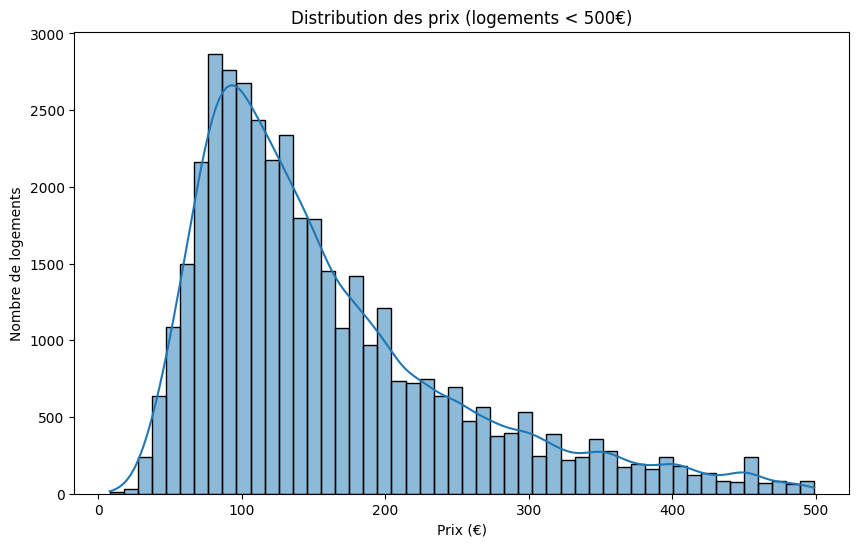

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille des graphiques
plt.figure(figsize=(10,6))

# Distribution des prix (limite à 500€ pour éviter les outliers extrêmes)
sns.histplot(df[df['price'] < 500]['price'], bins=50, kde=True)
plt.title("Distribution des prix (logements < 500€)")
plt.xlabel("Prix (€)")
plt.ylabel("Nombre de logements")
plt.show()


La majorité des logements coûtent entre 60€ et 150€.

Forte asymétrie à droite (beaucoup de logements peu chers, quelques très chers).

In [16]:
df.groupby('room_type')['price'].mean().sort_values(ascending=False)

room_type
Hotel room         295.723647
Entire home/apt    213.611801
Private room       146.868093
Shared room         65.857143
Name: price, dtype: float64

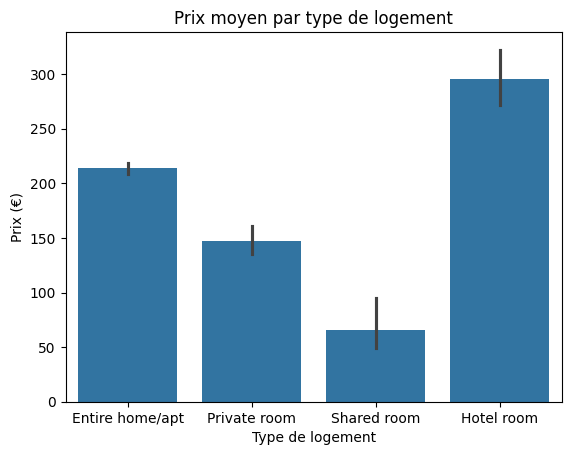

In [17]:
sns.barplot(x='room_type', y='price', data=df)
plt.title("Prix moyen par type de logement")
plt.ylabel("Prix (€)")
plt.xlabel("Type de logement")
plt.show()

In [18]:
top_quartiers = df['neighbourhood_cleansed'].value_counts().head(10).index
df_top = df[df['neighbourhood_cleansed'].isin(top_quartiers)]



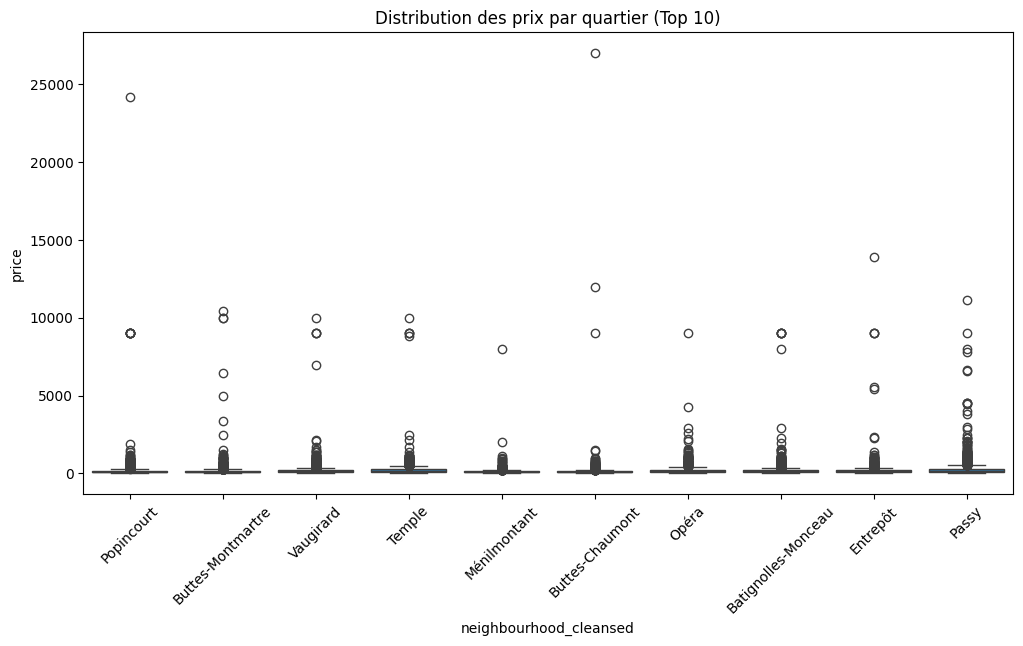

In [19]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=45)
plt.title("Distribution des prix par quartier (Top 10)")
plt.show()